In [5]:
%matplotlib inline 

import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt


In [6]:
# Import the dataset for boston's housing market
from sklearn.datasets import load_boston
boston_housing = load_boston()

In [7]:
# Print keys
print(boston_housing.keys())

# Print featues names
print(boston_housing.feature_names)

# Print DESCR
print(boston_housing.DESCR)

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility 

In [8]:
# Because of performance, convenience and convention we want to work with panda data frames
boston_housing_df = pd.DataFrame(boston_housing.data)
# We set the column names to featues_names
boston_housing_df.columns = boston_housing.feature_names

# And we also add the target(price) to the data frame
boston_housing_df['PRICE'] = boston_housing.target * 1000 # multiply every element with 1000

In [9]:
print(boston_housing_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT    PRICE  
0     15.3  396.90   4.98  24000.0  
1     17.8  396.90   9.14  21600.0  
2     17.8  392.83   4.03  34700.0  
3     18.7  394.63   2.94  33400.0  
4     18.7  396.90   5.33  36200.0  


In [10]:
# Print the summary statistics of the data frame
print(boston_housing_df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

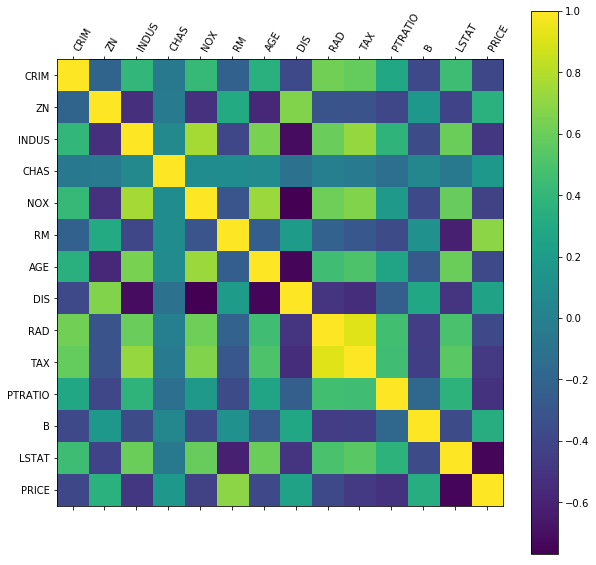

In [11]:
correl = boston_housing_df.corr()
print(correl)
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(correl)
plt.xticks(range(len(correl.columns)), correl.columns, rotation = 60, ha='left');
plt.yticks(range(len(correl.columns)), correl.columns);
fig.colorbar(cax)
plt.show()

In [114]:
# Lets do some machine learning :)

X = boston_housing_df.drop('PRICE', axis=1) # All of the features we want to use to predict the target
Y = boston_housing_df.PRICE # The target's we want to predict

# We also want to split our data into training and testing data, so we can make sure our model works 

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

from sklearn.ensemble.forest import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, random_state=2016)

model.fit(X_train, Y_train) # Train the model using our training data

# Predict house prices based on the testing features 
Y_pred_plain_rdf = model.predict(X_test)
Y_diff_plain_rdf = Y_pred_plain_rdf - Y_test

# Will be used to check if model, pipeline and pmml model in scala behave the same
test_feature = np.array([5.69175, 0.00, 18.100, 0, 0.5830, 6.1140, 79.80, 3.5459, 24, 666.0, 20.20, 392.68, 14.98])
# Reshape, because 1d array support is deprecated
model.predict(test_feature.reshape(1, -1))

array([ 18640.])

In [116]:
# Lets try packaging the model within a pmml pipeline

from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline

pipeline = PMMLPipeline([
    ('classifier', model)
])

pipeline.fit(X_train, Y_train)

Y_pred_pmml = pipeline.predict(X_test)
Y_diff_pmml = Y_pred_pmml - Y_test

sklearn2pmml(pipeline, "Bosten_Housing_Model_RDF.pmml", with_repr = True)

pipeline.predict(test_feature.reshape(1, -1)) # Reshape, because 1d array support is deprecated

array([ 18640.])

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Tools\Anaconda2\h2o_jar\h2o.jar
  Ice root: c:\users\c28458\appdata\local\temp\tmp0wiou4
  JVM stdout: c:\users\c28458\appdata\local\temp\tmp0wiou4\h2o_C28458_started_from_python.out
  JVM stderr: c:\users\c28458\appdata\local\temp\tmp0wiou4\h2o_C28458_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,1 month and 22 days
H2O cluster name:,H2O_from_python_C28458_bm6ztl
H2O cluster total nodes:,1
H2O cluster free memory:,14.21 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [141]:
# Lets try creating an h2O Mojo

import h2o
from h2o.estimators.random_forest import H2ORandomForestEstimator

h2o.init()
h2o.remove_all()

h2o_rdf = H2ORandomForestEstimator(
    model_id="rdf",
    ntrees=150,
    stopping_rounds=50,
    score_each_iteration=True,
seed=2016)

# H2o uses it's own data frame implementation, which we need to use
h2o_x_train = h2o.H2OFrame(python_obj=np.array(X_train))
# We need the columns or h2o wont match them during prediction
h2o_x_train.columns = boston_housing.feature_names.tolist() 

h2o_y_train = h2o.H2OFrame(python_obj=np.array(Y_train))

h2o_rdf.fit(h2o_x_train, h2o_y_train)

h2o_test_feature = h2o.H2OFrame(python_obj=np.array(test_feature).reshape(1, -1))
h2o_test_feature.columns = boston_housing.feature_names.tolist()

h2o_rdf.predict(h2o_test_feature)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Tools\Anaconda2\h2o_jar\h2o.jar
  Ice root: c:\users\c28458\appdata\local\temp\tmpzdtuyn
  JVM stdout: c:\users\c28458\appdata\local\temp\tmpzdtuyn\h2o_C28458_started_from_python.out
  JVM stderr: c:\users\c28458\appdata\local\temp\tmpzdtuyn\h2o_C28458_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Europe/Berlin
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,1 month and 22 days
H2O cluster name:,H2O_from_python_C28458_0nv77k
H2O cluster total nodes:,1
H2O cluster free memory:,14.21 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


C:\Tools\Anaconda2\lib\site-packages\ipykernel_launcher.py:23: UserWarning: 

	`fit` is not recommended outside of the sklearn framework. Use `train` instead.


drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


predict
19386


In [146]:
h2o_x_test = h2o.H2OFrame(python_obj=np.array(X_test))
h2o_x_test.columns = boston_housing.feature_names.tolist()

Y_pred_h2o = h2o_rdf.predict(h2o_x_test).as_data_frame().as_matrix().reshape(-1, )
Y_diff_h2o = Y_pred_h2o - Y_test


modelfile = h2o_rdf.download_mojo(path='C:/Users/C28458/Desktop/boston_ml_example/h2o/rdf/', get_genmodel_jar=True)
print("Model saved to " + modelfile)

# Shutdown the cluster
#h2o.cluster().shutdown(prompt=False)

Parse progress: |█████████████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
Model saved to C:\Users\C28458\Desktop\boston_ml_example\h2o\rdf\rdf.zip


In [247]:
# Lets try packaging the model within a with mleap
#from sklearn.pipeline import Pipeline

import mleap.sklearn.pipeline
from mleap.sklearn.pipeline import Pipeline
from mleap.sklearn.ensemble import forest
from sklearn.pipeline import Pipeline


model.mlinit(input_features='input features', prediction_column='PRICE', 
                 feature_names=boston_housing_df.columns.tolist())


# Package the model into a ml Pipeline
pipeline_mleap = Pipeline([
    ('classifier', model)
])

pipeline_mleap.mlinit()
pipeline_mleap.fit(X_train, Y_train)



Y_pred_mleap = pipeline_mleap.predict(X_test)
Y_diff_mleap = Y_pred_mleap - Y_test

print(pipeline_mleap.predict(test_feature.reshape(1, -1)))

# Serialiaze the random forest model
pipeline_mleap.serialize_to_bundle('C:/tmp/', 'mleap-bundle', init=True)


[ 18640.]


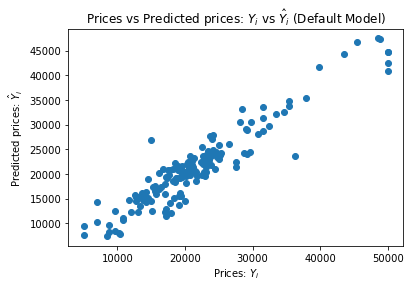

In [118]:
# A perfect plot would build a perfect linear line from min to max
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (Default Model)")

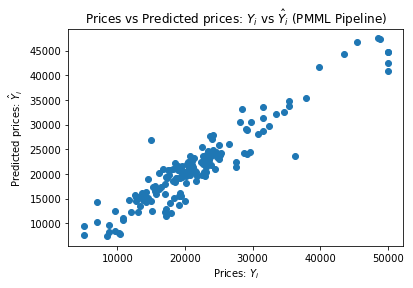

In [119]:
# A perfect plot would build a perfect linear line from min to max
plt.scatter(Y_test, Y_pred_pmml)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (PMML Pipeline)")

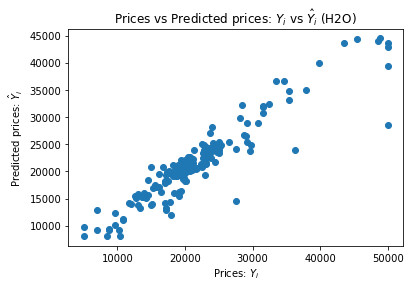

In [122]:
# A perfect plot would build a perfect linear line from min to max
plt.scatter(Y_test, Y_pred_h2o)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$ (H2O)")

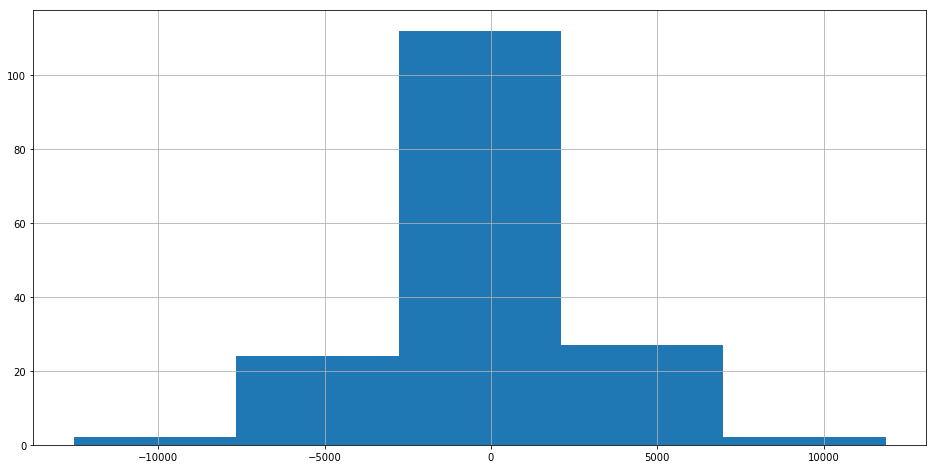

In [129]:
Y_diff.hist(bins=5, figsize=(16,8))

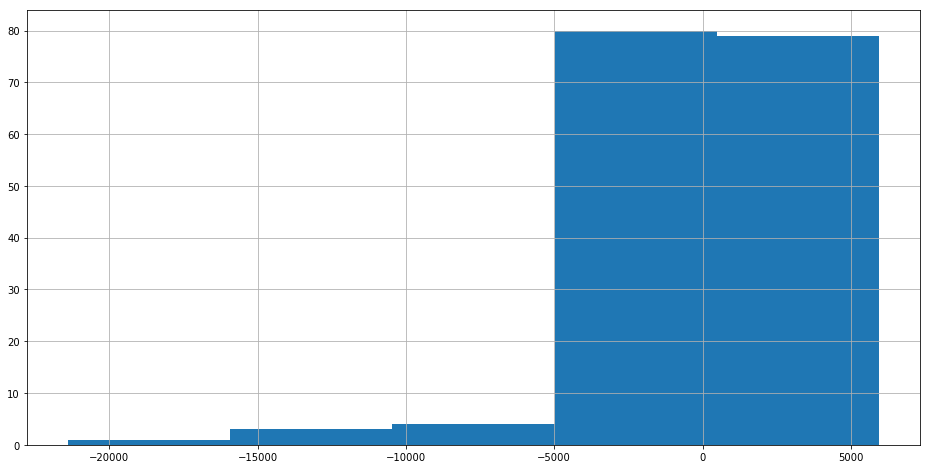

In [135]:
Y_diff_h2o.hist(bins=5, figsize=(16,8))

<function matplotlib.pyplot.show>

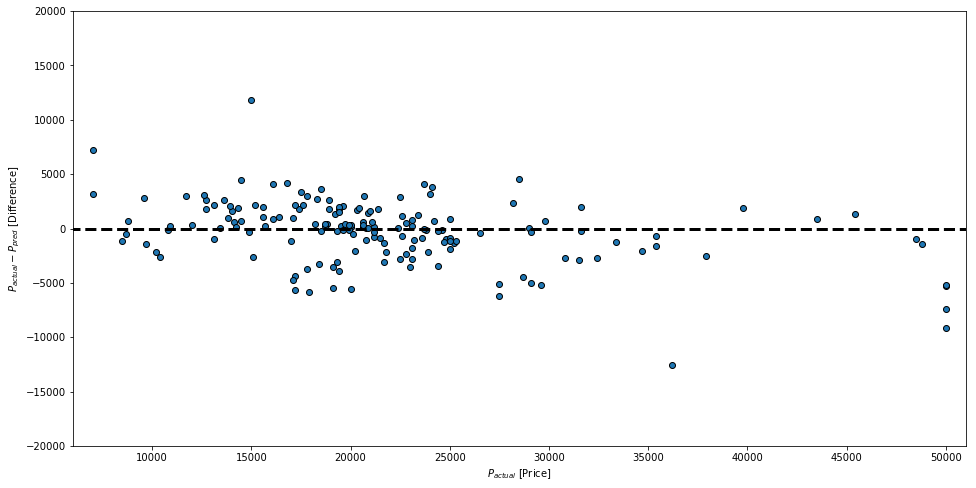

In [111]:
plt.figure(figsize=(16,8))
plt.scatter(Y_test, Y_diff, edgecolors=(0, 0, 0), alpha=1.)
plt.plot([Y_test.min(), Y_test.max()+1000], [0, 0], 'k--', lw=3)
plt.ylim((-20000, 20000))
plt.xlim((Y_test.min() + 1000, Y_test.max()+1000))
plt.xlabel("$P_{actual}$ [Price]")
plt.ylabel("$P_{actual} - P_{pred}$ [Difference]")
plt.show

<function matplotlib.pyplot.show>

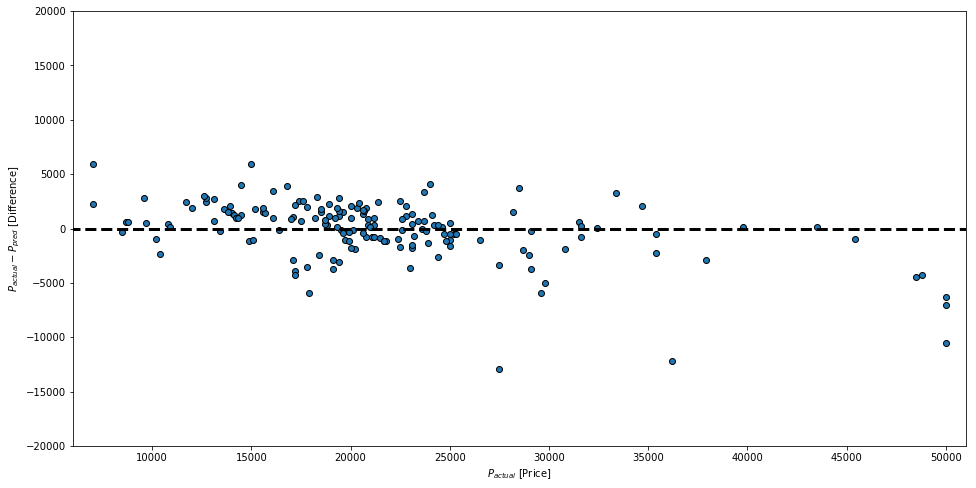

In [136]:
plt.figure(figsize=(16,8))
plt.scatter(Y_test, Y_diff_h2o, edgecolors=(0, 0, 0), alpha=1.)
plt.plot([Y_test.min(), Y_test.max()+1000], [0, 0], 'k--', lw=3)
plt.ylim((-20000, 20000))
plt.xlim((Y_test.min() + 1000, Y_test.max()+1000))
plt.xlabel("$P_{actual}$ [Price]")
plt.ylabel("$P_{actual} - P_{pred}$ [Difference]")
plt.show

In [140]:
# Lets use some metrics to check if our predictions are 'accurate'
from sklearn import metrics
from math import sqrt


# Sklearn & PMML

# Measures how close our prediction are to the actual values (1 is best)
print('Sklearn: R2 in testing set = ', metrics.r2_score(Y_pred, Y_test))

# Mean absolute error
print('Sklearn: MAE in testing set = ', metrics.mean_absolute_error(Y_pred, Y_test))

# Root mean squared error (inteprets larger error's as worse)
print('Sklearn: RMSE in testing  set = ', sqrt(metrics.mean_squared_error(Y_pred, Y_test)))

# H2O

print('H2o: R2 in testing set = ', metrics.r2_score(Y_pred_h2o, Y_test))
print('H2o: MAE in testing set = ', metrics.mean_absolute_error(Y_pred_h2o, Y_test))
print('H2o: RMSE in testing  set = ', sqrt(metrics.mean_squared_error(Y_pred_h2o, Y_test)))

('Sklearn: R2 in testing set = ', 0.86332990459201941)
('Sklearn: MAE in testing set = ', 2096.8263473053894)
('Sklearn: RMSE in testing  set = ', 2923.4227540337706)
('H2o: R2 in testing set = ', 0.81151977628514294)
('H2o: MAE in testing set = ', 2054.0911130863278)
('H2o: RMSE in testing  set = ', 3210.902874028726)
